In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE  # For over-sampling
from sklearn.linear_model import LogisticRegression
from lime.lime_tabular import LimeTabularExplainer


In [2]:
#data = pd.read_csv('/home/devsham/Downloads/encounterGPT.csv') encounterGPTLates
data = pd.read_csv('/home/devsham/Downloads/encounterGPTLates2.csv') 

In [3]:
data.head()

,encounter,month_year,gender,Age,inquiry,diagnosis,pid,rid,product
0,702083,October 2023,Female,3,Child has a wet cough and a congested nose for...,Acute nasopharyngitis [common cold],134231,5651,ISORYN PEADIATRIC
1,702083,October 2023,Female,3,Child has a wet cough and a congested nose for...,Acute nasopharyngitis [common cold],134231,704,MUCOLEX SYRUP 100ML
2,702083,October 2023,Female,3,Child has a wet cough and a congested nose for...,Acute nasopharyngitis [common cold],134231,355,APFLU SYRUP 100ML
3,702085,October 2023,Female,9,Child has a congested nose and a headache for ...,Acute nasopharyngitis [common cold],134232,259,APIDONE SYRUP 125ML
4,702085,October 2023,Female,9,Child has a congested nose and a headache for ...,Acute nasopharyngitis [common cold],134232,362,PANADOL ADVANCE


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88090 entries, 0 to 88089
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   encounter   88090 non-null  int64 
 1   month_year  88090 non-null  object
 2   gender      88090 non-null  object
 3   Age         88090 non-null  int64 
 4   inquiry     88090 non-null  object
 5   diagnosis   88090 non-null  object
 6   pid         88090 non-null  int64 
 7   rid         88090 non-null  int64 
 8   product     88090 non-null  object
dtypes: int64(4), object(5)
memory usage: 6.0+ MB


In [5]:
data.describe()

,encounter,Age,pid,rid
count,88090.000000,88090.000000,88090.000000,88090.000000
mean,805331.263549,26.497083,162903.934964,2259.247690
std,56698.227607,18.223025,15823.104941,4931.086321
min,702083.000000,0.000000,134231.000000,127.000000
25%,758496.000000,7.000000,149819.500000,269.000000
50%,808829.500000,30.000000,163685.000000,362.000000
75%,855118.000000,38.000000,176718.000000,4359.000000
max,898659.000000,124.000000,188734.000000,63053.000000


In [6]:
data.shape

(88090, 9)

In [7]:
data = data.drop(['pid', 'rid', 'inquiry', 'month_year', 'encounter'], axis=1)

In [8]:
data.shape

(88090, 4)

In [9]:
df = pd.DataFrame(data)

### Remove rows with commas in diagnosis


In [10]:
df = df[~df['diagnosis'].str.contains(",", na=False)]

In [11]:
df.head()

,gender,Age,diagnosis,product
0,Female,3,Acute nasopharyngitis [common cold],ISORYN PEADIATRIC
1,Female,3,Acute nasopharyngitis [common cold],MUCOLEX SYRUP 100ML
2,Female,3,Acute nasopharyngitis [common cold],APFLU SYRUP 100ML
3,Female,9,Acute nasopharyngitis [common cold],APIDONE SYRUP 125ML
4,Female,9,Acute nasopharyngitis [common cold],PANADOL ADVANCE


In [12]:
df.tail()

,gender,Age,diagnosis,product
88043,Male,11,Acute gastritis,LIMZER CAPSULES 20/30MG 30s
88049,Female,30,Localized edema,FASTUM CREAM 50G
88050,Female,30,Localized edema,SAMSON VARICOSE VEIN STOCKNG BLW KNEE M
88053,Female,22,Epilepsy and recurrent seizures,TEGRETOL CR TABLETS 200MG
88072,Female,1,Bacteremia,AUGMENTIN SUSPENSION UK - 228MG/5ML


In [13]:
df.shape

(19396, 4)

In [14]:
df.isnull().sum()

gender       0
Age          0
diagnosis    0
product      0
dtype: int64

In [15]:
df.head()

,gender,Age,diagnosis,product
0,Female,3,Acute nasopharyngitis [common cold],ISORYN PEADIATRIC
1,Female,3,Acute nasopharyngitis [common cold],MUCOLEX SYRUP 100ML
2,Female,3,Acute nasopharyngitis [common cold],APFLU SYRUP 100ML
3,Female,9,Acute nasopharyngitis [common cold],APIDONE SYRUP 125ML
4,Female,9,Acute nasopharyngitis [common cold],PANADOL ADVANCE


In [16]:
# Descriptive statistics for numeric columns
numeric_stats = df.describe(include=["number"])
numeric_stats

,Age
count,19396.000000
mean,29.738967
std,18.047800
min,0.000000
25%,12.000000
50%,32.000000
75%,42.000000
max,124.000000


In [17]:
# Descriptive statistics for categorical columns
categorical_stats = df.describe(include=["object"])
categorical_stats

,gender,diagnosis,product
count,19396,19396,19396
unique,2,642,1044
top,Female,Essential (primary) hypertension,PANADOL ADVANCE
freq,10783,4254,664


### Univariate Analysis

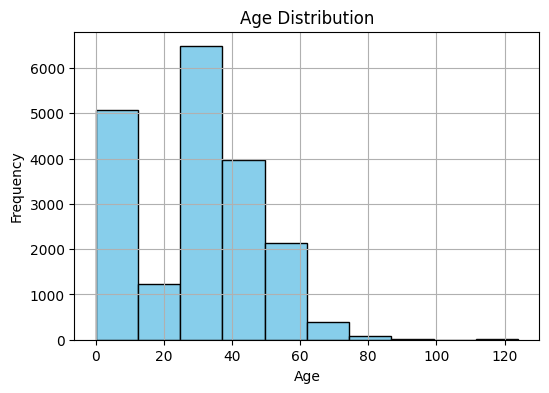

In [18]:
# Age Distribution
plt.figure(figsize=(6, 4))
df['Age'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

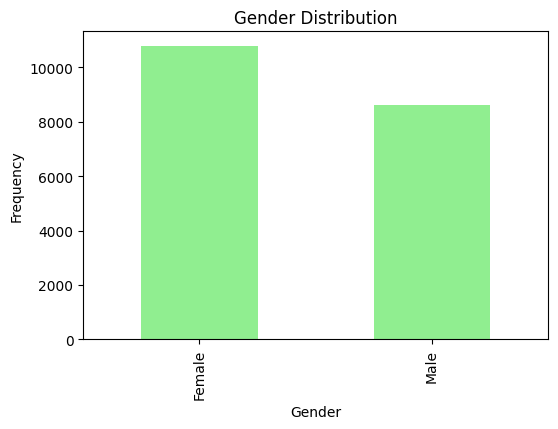

In [19]:
# Gender Distribution
plt.figure(figsize=(6, 4))
df['gender'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

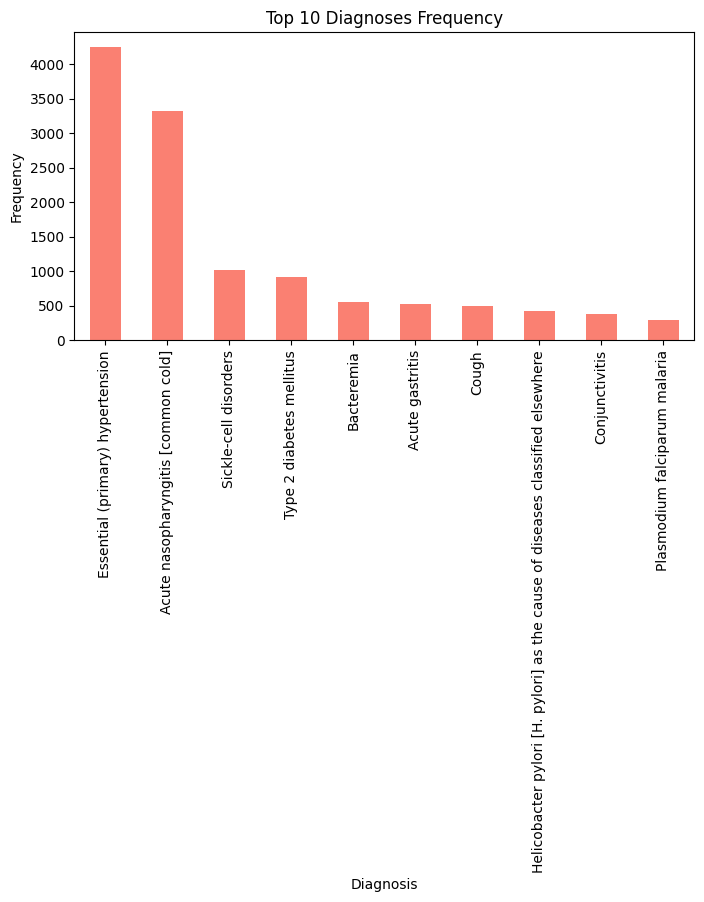

In [20]:
# Diagnosis Frequency
plt.figure(figsize=(8, 4))
top_diagnoses = df['diagnosis'].value_counts().head(10)
top_diagnoses.plot(kind='bar', color='salmon')
plt.title('Top 10 Diagnoses Frequency')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.show()

### Bivariate Analysis

/tmp/ipykernel_62329/1884725049.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product', y='Age', data=filtered_data, palette='pastel')


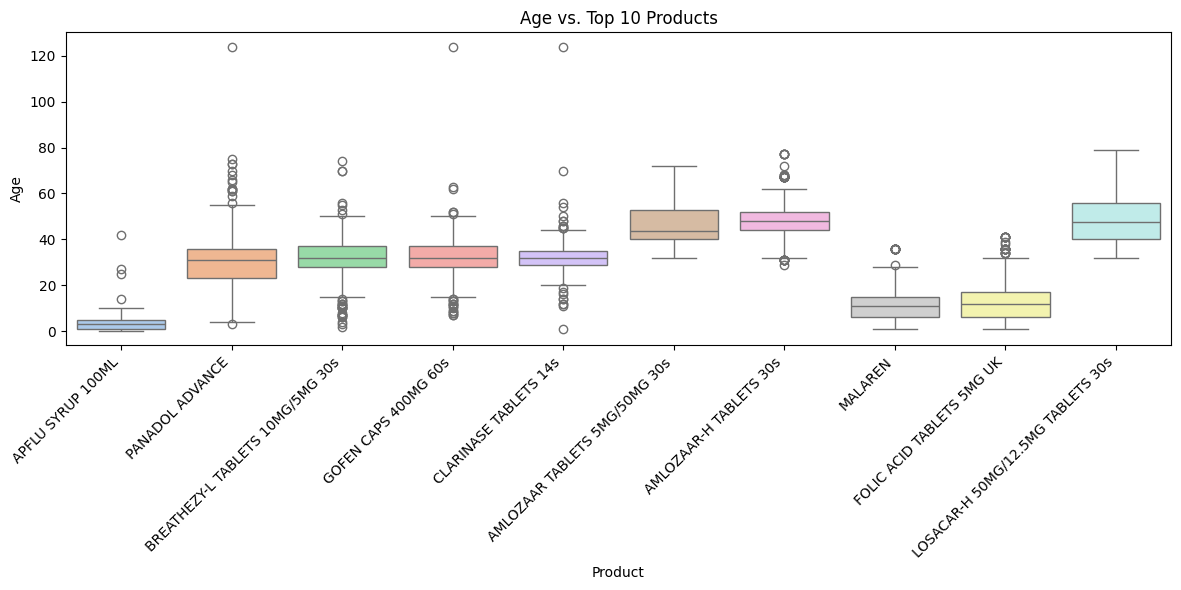

In [21]:
# Limit to the top 10 most common products
top_products = df['product'].value_counts().nlargest(10).index
filtered_data = df[df['product'].isin(top_products)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='product', y='Age', data=filtered_data, palette='pastel')
plt.title('Age vs. Top 10 Products')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.xlabel('Product')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


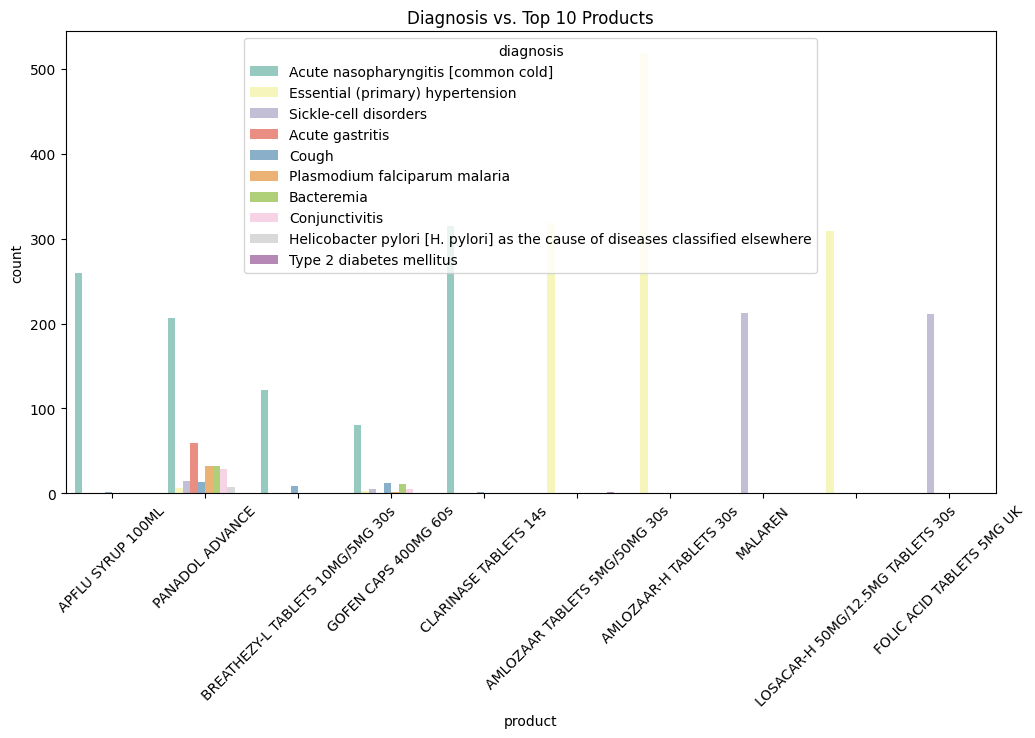

In [22]:
# Top 10 products and diagnoses
top_products = df['product'].value_counts().head(10).index
top_diagnoses = df['diagnosis'].value_counts().head(10).index

# Filter data to include only top products and diagnoses
filtered_data = df[df['product'].isin(top_products) & df['diagnosis'].isin(top_diagnoses)]

# Diagnosis vs. Product plot
plt.figure(figsize=(12, 6))
sns.countplot(x='product', hue='diagnosis', data=filtered_data, palette='Set3')
plt.title('Diagnosis vs. Top 10 Products')
plt.xticks(rotation=45)
plt.show()

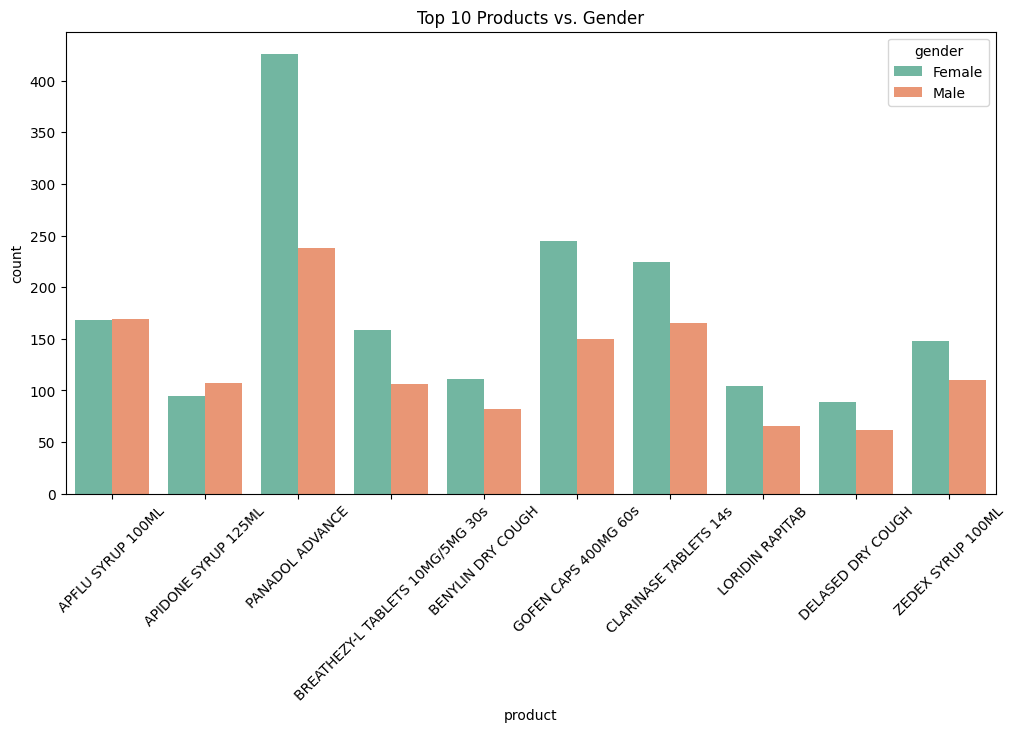

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 products based on frequency
top_10_products = data['product'].value_counts().head(10).index
filtered_data = df[df['product'].isin(top_10_products)]

# Plot the data
plt.figure(figsize=(12, 6))
sns.countplot(x='product', hue='gender', data=filtered_data, palette='Set2')
plt.title('Top 10 Products vs. Gender')
plt.xticks(rotation=45)
plt.show()

### Multivariate Analysis

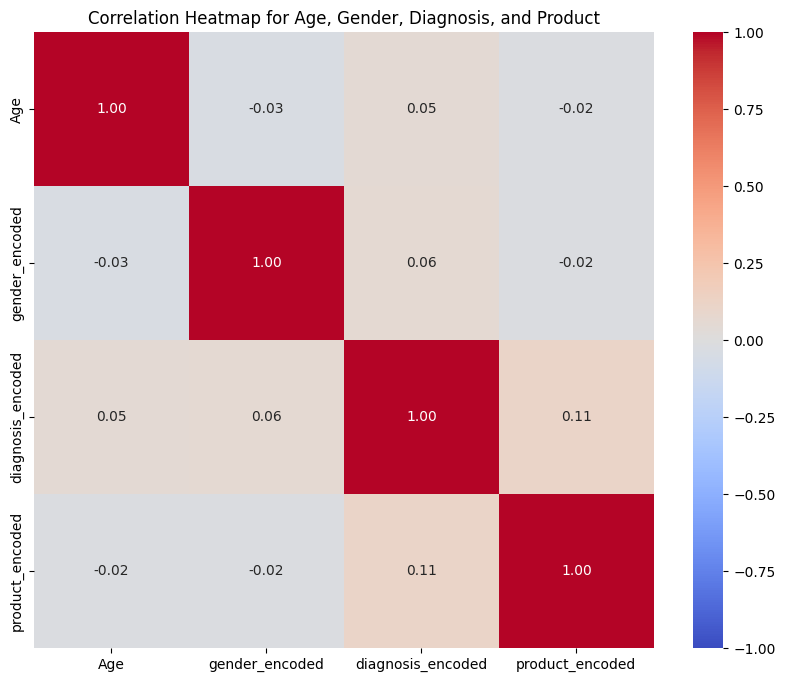

In [24]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
df['diagnosis_encoded'] = label_encoder.fit_transform(df['diagnosis'])
df['product_encoded'] = label_encoder.fit_transform(df['product'])

# Create a pivot table or contingency table between gender, diagnosis, and product
pivot_data = pd.crosstab(index=[df['gender_encoded'], df['diagnosis_encoded']], columns=df['product_encoded'])

# You can also include Age in the analysis
# If you want to include Age, you can calculate the correlation matrix (for continuous data like Age)
corr_matrix = df[['Age', 'gender_encoded', 'diagnosis_encoded', 'product_encoded']].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Age, Gender, Diagnosis, and Product')
plt.show()

In [25]:
df

,gender,Age,diagnosis,product,gender_encoded,diagnosis_encoded,product_encoded
0,Female,3,Acute nasopharyngitis [common cold],ISORYN PEADIATRIC,0,38,595
1,Female,3,Acute nasopharyngitis [common cold],MUCOLEX SYRUP 100ML,0,38,723
2,Female,3,Acute nasopharyngitis [common cold],APFLU SYRUP 100ML,0,38,88
3,Female,9,Acute nasopharyngitis [common cold],APIDONE SYRUP 125ML,0,38,90
4,Female,9,Acute nasopharyngitis [common cold],PANADOL ADVANCE,0,38,813
...,...,...,...,...,...,...,...
88043,Male,11,Acute gastritis,LIMZER CAPSULES 20/30MG 30s,1,28,651
88049,Female,30,Localized edema,FASTUM CREAM 50G,0,292,460
88050,Female,30,Localized edema,SAMSON VARICOSE VEIN STOCKNG BLW KNEE M,0,292,885
88053,Female,22,Epilepsy and recurrent seizures,TEGRETOL CR TABLETS 200MG,0,201,928


In [26]:
# from scipy.stats import chi2_contingency

# # Compute the Chi-square statistics between Diagnosis and Product
# contingency_table = pd.crosstab(df['diagnosis_encoded'], df['product_encoded'])

# # Chi-square test
# chi2, p, dof, expected = chi2_contingency(contingency_table)

# # Create a heatmap of p-values
# plt.figure(figsize=(12, 8))
# sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
# plt.title('Chi-Square Heatmap between Diagnosis and Product')
# plt.show()

In [27]:
# Encode categorical variables
# le_gender = LabelEncoder()
# df['gender'] = le_gender.fit_transform(df['gender'])

In [28]:
# le_diagnosis = LabelEncoder()
# df['diagnosis'] = le_diagnosis.fit_transform(df['diagnosis'])

In [29]:
# le_product = LabelEncoder()
# df['product'] = le_product.fit_transform(df['product'])

In [30]:
# Select features and target
#X = df[['gender', 'Age', 'diagnosis']]  # Exclude 'inquiry'
#y = df['product']
df

,gender,Age,diagnosis,product,gender_encoded,diagnosis_encoded,product_encoded
0,Female,3,Acute nasopharyngitis [common cold],ISORYN PEADIATRIC,0,38,595
1,Female,3,Acute nasopharyngitis [common cold],MUCOLEX SYRUP 100ML,0,38,723
2,Female,3,Acute nasopharyngitis [common cold],APFLU SYRUP 100ML,0,38,88
3,Female,9,Acute nasopharyngitis [common cold],APIDONE SYRUP 125ML,0,38,90
4,Female,9,Acute nasopharyngitis [common cold],PANADOL ADVANCE,0,38,813
...,...,...,...,...,...,...,...
88043,Male,11,Acute gastritis,LIMZER CAPSULES 20/30MG 30s,1,28,651
88049,Female,30,Localized edema,FASTUM CREAM 50G,0,292,460
88050,Female,30,Localized edema,SAMSON VARICOSE VEIN STOCKNG BLW KNEE M,0,292,885
88053,Female,22,Epilepsy and recurrent seizures,TEGRETOL CR TABLETS 200MG,0,201,928


In [31]:
# Step 1: Select features and target
X = df[['gender_encoded', 'Age', 'diagnosis_encoded']]  # Features
y = df['product_encoded']  # Target variable

# Step 2: Check class distribution before filtering
print("Class distribution before filtering:")
print(y.value_counts())

# Step 3: Exclude class with 1222 records and keep those with 300 or fewer
class_counts = y.value_counts()
classes_to_keep = class_counts[(class_counts != 1222) & (class_counts >= 300)].index
# classes_to_keep = class_counts[(class_counts != 6009) & (class_counts >= 1511)].index

# Step 4: Filter both X and y based on the classes to keep
X_filtered = X[y.isin(classes_to_keep)]
y_filtered = y[y.isin(classes_to_keep)]

# Step 5: Check class distribution after filtering
print("\nClass distribution after filtering:")
print(y_filtered.value_counts())

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.3, random_state=42
)

# Step 7: Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 8: Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Step 9: Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Step 10: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 11: Evaluate the model
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Class distribution before filtering:
product_encoded
813    664
62     519
543    395
273    389
88     337
      ... 
321      1
562      1
919      1
242      1
885      1
Name: count, Length: 1044, dtype: int64

Class distribution after filtering:
product_encoded
813    664
62     519
543    395
273    389
88     337
61     320
660    310
Name: count, dtype: int64

Class distribution after SMOTE:
product_encoded
813    454
62     454
543    454
273    454
660    454
88     454
61     454
Name: count, dtype: int64

Random Forest Classification Report:
              precision    recall  f1-score   support

          61       0.55      0.64      0.59       100
          62       0.74      0.44      0.55       146
          88       0.90      0.96      0.93       103
         273       0.49      0.69      0.57       114
         543       0.42      0.47      0.44       118
         660       0.47      0.70      0.56        90
         813       0.59      0.40      0.47       210

    ac

In [32]:
# Initialize AdaBoost with 50 estimators (trees)
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost model
ada_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = ada_model.predict(X_test)

# Evaluate the model
print("AdaBoostClassifier Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Print the accuracy score
print("\nAdaBoostClassifier Accuracy Score:", accuracy_score(y_test, y_pred))

AdaBoostClassifier Classification Report:
              precision    recall  f1-score   support

          61       0.00      0.00      0.00       100
          62       0.00      0.00      0.00       146
          88       0.86      0.86      0.86       103
         273       0.00      0.00      0.00       114
         543       0.46      0.47      0.46       118
         660       0.26      1.00      0.42        90
         813       0.46      0.70      0.56       210

    accuracy                           0.43       881
   macro avg       0.29      0.43      0.33       881
weighted avg       0.30      0.43      0.34       881


AdaBoostClassifier Accuracy Score: 0.4335981838819523


/home/devsham/.virtualenvs/JupyterNoteBook/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [33]:
# Step 3: Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Step 4: Train the Decision Tree model
dt_model.fit(X_resampled, y_resampled)

# Step 5: Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Step 6: Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Print the accuracy score
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

          61       0.55      0.64      0.59       100
          62       0.68      0.48      0.56       146
          88       0.89      0.98      0.94       103
         273       0.50      0.76      0.61       114
         543       0.47      0.51      0.49       118
         660       0.50      0.66      0.57        90
         813       0.63      0.39      0.48       210

    accuracy                           0.59       881
   macro avg       0.60      0.63      0.60       881
weighted avg       0.61      0.59      0.59       881


Accuracy Score: 0.5925085130533485


In [34]:
print("LogisticRegression Classification Report:")

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(class_weight='balanced', random_state=42)
log_reg_model.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred = log_reg_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("\n LogisticRegression Classification Score:", accuracy_score(y_test, y_pred))

LogisticRegression Classification Report:
              precision    recall  f1-score   support

          61       0.30      0.61      0.41       100
          62       0.54      0.05      0.09       146
          88       0.81      0.99      0.89       103
         273       0.38      0.80      0.51       114
         543       0.30      0.29      0.29       118
         660       0.26      0.38      0.31        90
         813       0.47      0.13      0.20       210

    accuracy                           0.40       881
   macro avg       0.44      0.46      0.39       881
weighted avg       0.45      0.40      0.35       881


 LogisticRegression Classification Score: 0.40408626560726446


/home/devsham/.virtualenvs/JupyterNoteBook/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.neighbors import KNeighborsClassifier
print("KNeighborsClassifier Classification Report:")


# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("\n KNeighborsClassifier Accuracy Score:", accuracy_score(y_test, y_pred))

KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

          61       0.58      0.57      0.57       100
          62       0.59      0.61      0.60       146
          88       0.89      0.99      0.94       103
         273       0.51      0.70      0.59       114
         543       0.51      0.62      0.56       118
         660       0.53      0.51      0.52        90
         813       0.63      0.39      0.48       210

    accuracy                           0.60       881
   macro avg       0.60      0.63      0.61       881
weighted avg       0.61      0.60      0.59       881


 KNeighborsClassifier Accuracy Score: 0.5993189557321226


In [36]:
from sklearn.svm import SVC
print("Support Vector Classification Report:")


# Initialize and train the SVM model
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Support Vector Classification Report:
              precision    recall  f1-score   support

          61       0.26      0.61      0.36       100
          62       0.41      0.18      0.25       146
          88       0.74      0.92      0.82       103
         273       0.39      0.88      0.54       114
         543       0.46      0.39      0.42       118
         660       0.36      0.23      0.28        90
         813       0.56      0.09      0.16       210

    accuracy                           0.42       881
   macro avg       0.45      0.47      0.41       881
weighted avg       0.46      0.42      0.37       881


Accuracy Score: 0.4188422247446084


In [37]:
from sklearn.ensemble import GradientBoostingClassifier
print("GradientBoostingClassifier Classification Report:")

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred_final_model = gb_model.predict(X_test)
print(classification_report(y_test, y_pred_final_model))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_final_model))

GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

          61       0.56      0.49      0.52       100
          62       0.59      0.58      0.58       146
          88       0.91      0.96      0.93       103
         273       0.53      0.81      0.64       114
         543       0.51      0.58      0.54       118
         660       0.49      0.57      0.52        90
         813       0.71      0.44      0.54       210

    accuracy                           0.61       881
   macro avg       0.61      0.63      0.61       881
weighted avg       0.62      0.61      0.60       881


Accuracy Score: 0.6083995459704881


In [38]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          61       0.00      0.00      0.00       100
          62       0.45      0.84      0.58       146
          88       0.77      0.94      0.85       103
         273       0.35      0.79      0.49       114
         543       0.43      0.31      0.36       118
         660       0.38      0.27      0.31        90
         813       0.51      0.15      0.23       210

    accuracy                           0.46       881
   macro avg       0.41      0.47      0.40       881
weighted avg       0.43      0.46      0.39       881


Accuracy Score: 0.45629965947786605


In [39]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
mlp_model.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred = mlp_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          61       0.50      0.03      0.06       100
          62       0.38      0.96      0.55       146
          88       0.74      1.00      0.85       103
         273       0.41      0.86      0.56       114
         543       0.42      0.32      0.37       118
         660       0.44      0.04      0.08        90
         813       0.73      0.11      0.20       210

    accuracy                           0.47       881
   macro avg       0.52      0.48      0.38       881
weighted avg       0.54      0.47      0.37       881


Accuracy Score: 0.46538024971623154


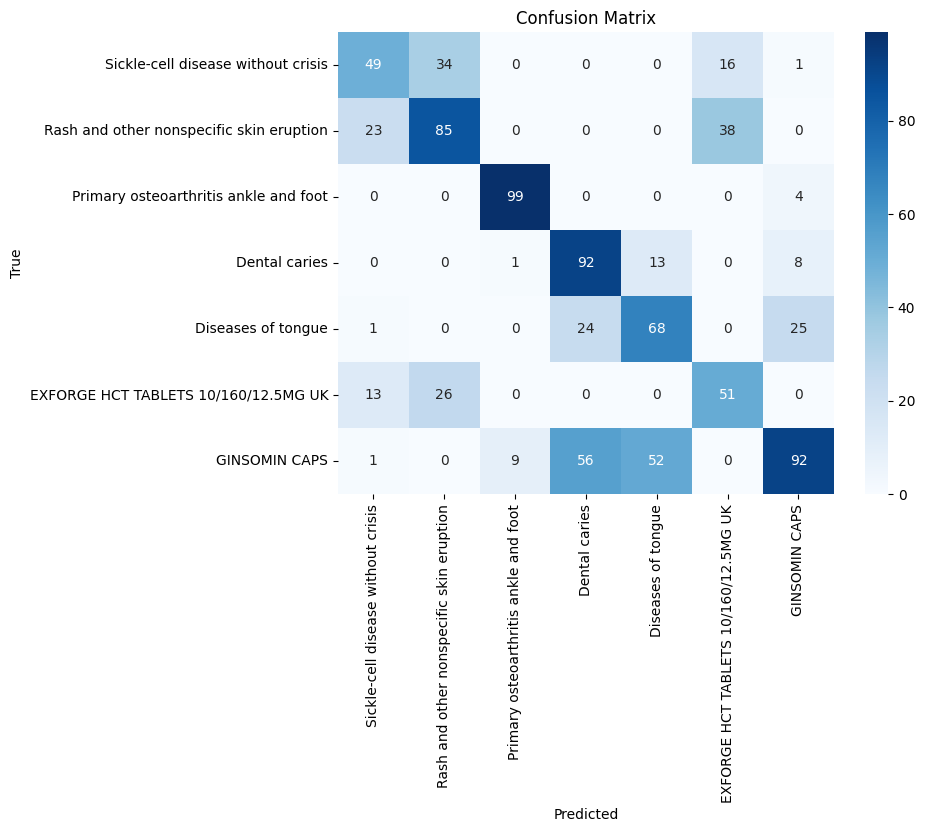

In [47]:
# Step 1: Assuming y_test and y_pred_final_model are available, compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_final_model)

# Step 2: Get the unique labels from the test data (assumes they are categorical)
unique_labels = np.unique(y_test)

# Step 3: Map encoded values back to original labels
# Assuming you have a DataFrame 'data' with the encoded columns
label_map_gender = dict(enumerate(df['gender'].unique()))  # Mapping gender encoded to original
label_map_diagnosis = dict(enumerate(df['diagnosis'].unique()))  # Mapping diagnosis encoded to original
label_map_product = dict(enumerate(df['product'].unique()))  # Mapping product encoded to original

# Step 4: Use the labels for the axis in the heatmap
yticklabels = [label_map_gender[label] if label in label_map_gender else 
               label_map_diagnosis[label] if label in label_map_diagnosis else
               label_map_product[label] for label in unique_labels]

xticklabels = yticklabels  # Since you are using the same encoding for both axes

# Step 5: Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=xticklabels, yticklabels=yticklabels)

# Step 6: Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Step 7: Show the plot
plt.show()

### Diagnal elements represent correct prediction

#### XAI

####  The goal of XAI is to give an understanding behing the way a model makes predictions. understanding the reasoning behind the pre-
#### dictions of a model, and specifically, understanding why a prediction has been made, Users should only trust a model if it they can easily interpret it.

#### LIME and SHAP help us archive this goal.

#### LIME (Local Interpretable Model-agnostic Explanations)
#### Is a revolutionary approach for interpreting and faithfully explaining individual predictions of any machine learning.

#### It reveals the reasoning behind a model’s decision-making with the explanation
#### Then people will be able to see beyond the machine learning model and trust the predictions it makes.

#### SHAP (SHapley Additive exPlanations)
#### is also a novel way of explaining individual predictions

#### The second idea that has motivated the project is to see how these two methods are applied in the health industry, concretely in a scenario where we want to validate or reject a prediction.

#### the aim of the project is to understand the reasons for baseline predictions.

#### A model is more interpretable than another if its decisions are simpler for humans to understand than the other model’s decisions.

In [48]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import pandas as pd

# Assuming df contains the dataset with 'product_encoded' and 'product'
# Assuming y_filtered contains the encoded target labels

# Step 1: Create a mapping from encoded values to product names
# Ensure all possible classes in y_filtered are mapped
encoded_to_product = {
    encoded: df.loc[df['product_encoded'] == encoded, 'product'].iloc[0]
    if encoded in df['product_encoded'].values
    else f"Unknown Product {encoded}"
    for encoded in np.unique(y_filtered)
}

# Create short keys for each class
key_to_product = {f"Class {i}": name for i, name in enumerate(encoded_to_product.values())}
product_to_key = {name: key for key, name in key_to_product.items()}  # Reverse mapping

# Use short keys as class names in LIME
class_names = list(key_to_product.keys())

# Step 2: Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,                 # Training data
    feature_names=['gender', 'Age', 'diagnosis'], # Explicitly list the column names
    class_names=class_names,                      # Short class names
    mode='classification'                         # Set mode to classification
)

# Step 3: Apply LIME to a single prediction
i = 10  # Index of the test instance to explain
instance = X_test.iloc[i].values.reshape(1, -1)  # Ensure the instance is reshaped correctly

# Predict the class for this instance
predicted_class = gb_model.predict(instance)[0]
predicted_product = encoded_to_product.get(predicted_class, f"Unknown Product {predicted_class}")
predicted_key = product_to_key.get(predicted_product, "Unknown Class")

print("Predicted class:", predicted_key, "->", predicted_product)

# Step 4: Generate LIME explanation
explanation = explainer.explain_instance(
    data_row=X_test.iloc[i].values,  # Instance to explain (consistent with training format)
    predict_fn=gb_model.predict_proba  # Predict function for probabilities
)

# Step 5: Visualize the explanation
explanation.show_in_notebook(show_table=True)

# Step 6: Display the key mapping for reference
print("\nClass Key Mapping:")
for key, product in key_to_product.items():
    print(f"{key}: {product}")


Predicted class: Class 5 -> LOSACAR-H 50MG/12.5MG TABLETS 30s


/home/devsham/.virtualenvs/JupyterNoteBook/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/devsham/.virtualenvs/JupyterNoteBook/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



Class Key Mapping:
Class 0: AMLOZAAR TABLETS 5MG/50MG 30s
Class 1: AMLOZAAR-H TABLETS 30s
Class 2: APFLU SYRUP 100ML
Class 3: CLARINASE TABLETS 14s
Class 4: GOFEN CAPS 400MG 60s
Class 5: LOSACAR-H 50MG/12.5MG TABLETS 30s
Class 6: PANADOL ADVANCE
